In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
file ="flavors_of_cacao.csv"
df_chocolate = pd.read_csv(file)
df_chocolate.head()

,Company,Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [3]:
#Changing column names
#columns_name = ['Company', 'Bean_Origin', 'REF', 'Review_Date', 'Cocoa_Percentage', 'Company_Location', 'Rating', 'Bean_Type', 'Broad_Bean_Origin'] 
#df_chocolate.columns = columns_name
#df_chocolate

In [4]:
#Converting String Cocoa_Percent column into Integers
df_chocolate["Cocoa_Percent"] = df_chocolate["Cocoa_Percent"].str.replace('%', '')
df_chocolate['Cocoa_Percent'] = df_chocolate['Cocoa_Percent'].str.replace('.', '')
df_chocolate["Cocoa_Percent"]= df_chocolate["Cocoa_Percent"].astype(float)/100
df_chocolate["Cocoa_Percent"]

C:\Users\Tata\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


0       0.63
1       0.70
2       0.70
3       0.70
4       0.70
        ... 
1790    0.70
1791    0.65
1792    0.65
1793    0.62
1794    0.65
Name: Cocoa_Percent, Length: 1795, dtype: float64

In [5]:

#df_chocolate["Rating"] = df_chocolate["Rating"].apply(int)

#df_chocolate["Rating"] = df_chocolate["Rating"].apply(np.floor).astype(np.int64)
#df_chocolate["Rating"] 

In [6]:
df_chocolate.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Company                  1795 non-null   object 
 1   Bean_Origin_or_Bar_Name  1795 non-null   object 
 2   REF                      1795 non-null   int64  
 3   Review_Date              1795 non-null   int64  
 4   Cocoa_Percent            1795 non-null   float64
 5   Company_Location         1795 non-null   object 
 6   Rating                   1795 non-null   float64
 7   Bean_Type                1794 non-null   object 
 8   Broad_Bean_Origin        1794 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 126.3+ KB


In [7]:
df_chocolate.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company,1795,416,Soma,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bean_Origin_or_Bar_Name,1795,1039,Madagascar,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN
REF,1795.0,NaN,NaN,NaN,1035.904735,552.886365,5.0,576.0,1069.0,1502.0,1952.0
Review_Date,1795.0,NaN,NaN,NaN,2012.325348,2.92721,2006.0,2010.0,2013.0,2015.0,2017.0
Cocoa_Percent,1795.0,NaN,NaN,NaN,0.741928,0.404268,0.42,0.7,0.7,0.75,7.35
Company_Location,1795,60,U.S.A.,764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,1795.0,NaN,NaN,NaN,3.185933,0.478062,1.0,2.875,3.25,3.5,5.0
Bean_Type,1794,41,,887,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Broad_Bean_Origin,1794,100,Venezuela,214,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_chocolate.isnull().sum()

Company                    0
Bean_Origin_or_Bar_Name    0
REF                        0
Review_Date                0
Cocoa_Percent              0
Company_Location           0
Rating                     0
Bean_Type                  1
Broad_Bean_Origin          1
dtype: int64

In [9]:
# Determine the number of unique values in each column.
df_chocolate.nunique()

Company                     416
Bean_Origin_or_Bar_Name    1039
REF                         440
Review_Date                  12
Cocoa_Percent                45
Company_Location             60
Rating                       13
Bean_Type                    41
Broad_Bean_Origin           100
dtype: int64

In [10]:
# Drop null values
df_chocolate.dropna(axis=0, how='any', inplace=True)

In [11]:
df_chocolate['Bean_Type'].value_counts()

                            887
Trinitario                  418
Criollo                     153
Forastero                    87
Forastero (Nacional)         52
Blend                        41
Criollo, Trinitario          39
Forastero (Arriba)           37
Criollo (Porcelana)          10
Trinitario, Criollo           9
Forastero (Parazinho)         8
Forastero (Arriba) ASS        6
Beniano                       3
EET                           3
Matina                        3
Nacional (Arriba)             3
Criollo, Forastero            2
Amazon, ICS                   2
Trinitario (85% Criollo)      2
Forastero (Catongo)           2
Nacional                      2
Criollo (Amarru)              2
Trinitario, Forastero         2
Amazon mix                    2
Criollo (Ocumare 61)          2
Forastero (Amelonado)         1
CCN51                         1
Forastero (Arriba) ASSS       1
Blend-Forastero,Criollo       1
Trinitario (Amelonado)        1
Forastero, Trinitario         1
Foraster

In [12]:
#replace the values in the bean_type column
def replace_beans (bean_type):
    #order of criollo, trinitario, and forastero was decided by seeing the number of times it appears
    if 'Criollo' in bean_type:
        return 'Criollo'
    elif 'Trinitario' in bean_type:
        return 'Trinitario'
    elif 'Forastero' in bean_type:
        return 'Forastero'
    else:
        return bean_type
    
df_chocolate['Bean_Type'] = df_chocolate['Bean_Type'].map(lambda bean_type: replace_beans(bean_type))

In [13]:
df_chocolate['Bean_Type'].value_counts()

                     887
Trinitario           425
Criollo              225
Forastero            195
Blend                 41
Matina                 3
Beniano                3
Nacional (Arriba)      3
EET                    3
Amazon, ICS            2
Amazon mix             2
Nacional               2
CCN51                  1
Amazon                 1
Name: Bean_Type, dtype: int64

In [14]:
list(df_chocolate['Bean_Type'][0:5])

['\xa0', '\xa0', '\xa0', '\xa0', '\xa0']

In [15]:
# Look at Broad Bean Origin value counts for binning
Broad_Bean_Origin_counts=df_chocolate['Broad_Bean_Origin'].value_counts()
Broad_Bean_Origin_counts


Venezuela                        214
Ecuador                          193
Peru                             165
Madagascar                       145
Dominican Republic               141
                                ... 
Trinidad-Tobago                    1
Burma                              1
Peru(SMartin,Pangoa,nacional)      1
Mad., Java, PNG                    1
Trinidad, Ecuador                  1
Name: Broad_Bean_Origin, Length: 99, dtype: int64

<AxesSubplot:ylabel='Density'>

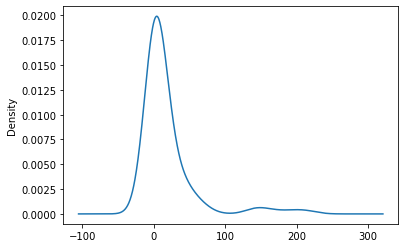

In [16]:
# Visualize the value counts of Broad Bean Origin
Broad_Bean_Origin_counts.plot.density()

In [17]:
# Look at Broad Bean Origin value counts for binning
Bean_Origin_counts=df_chocolate['Bean_Origin_or_Bar_Name'].value_counts()
Bean_Origin_counts

Madagascar                  56
Peru                        45
Ecuador                     42
Dominican Republic          37
Venezuela                   21
                            ..
Brooklyn Blend               1
Roberto                      1
Crudo                        1
Antigua, Special Reserve     1
Citrus-beta                  1
Name: Bean_Origin_or_Bar_Name, Length: 1038, dtype: int64

In [18]:
# check any N/A values in  
df_chocolate['Bean_Origin_or_Bar_Name'].isnull().value_counts()

False    1793
Name: Bean_Origin_or_Bar_Name, dtype: int64

In [19]:
# Look at Broad Bean Origin value counts for binning
Company_counts=df_chocolate['Company'].value_counts()
Company_counts

Soma                              46
Bonnat                            27
Fresco                            26
Pralus                            25
A. Morin                          23
                                  ..
Malagos                            1
Two Ravens                         1
Chocolats Privilege                1
Rococo (Grenada Chocolate Co.)     1
Santome                            1
Name: Company, Length: 416, dtype: int64

In [20]:
Rating_counts=df_chocolate['Rating'].value_counts()
Rating_counts

3.50    392
3.00    341
3.25    303
2.75    259
3.75    210
2.50    126
4.00     97
2.00     32
2.25     14
1.50     10
1.00      4
1.75      3
5.00      2
Name: Rating, dtype: int64

<AxesSubplot:ylabel='Density'>

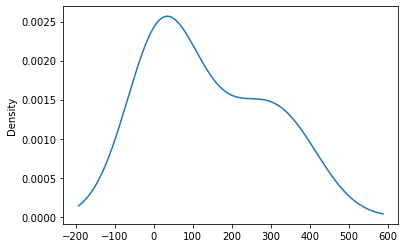

In [21]:
# Visualize the value counts of Broad Bean Origin
Rating_counts.plot.density()

In [22]:
# Determine which values to replace if counts are less than ...?
replace_Rating= list(Rating_counts[Rating_counts < 90].index)

# Replace in dataframe
for Rat in replace_Rating:
    df_chocolate.Rating = df_chocolate.Rating.replace(Rat,"Other")
    
# Check to make sure binning was successful
df_chocolate.Rating.value_counts()

3.5      392
3.0      341
3.25     303
2.75     259
3.75     210
2.5      126
4.0       97
Other     65
Name: Rating, dtype: int64

In [23]:
Cocoa_Percentage_counts=df_chocolate['Cocoa_Percent'].value_counts()
Cocoa_Percentage_counts

0.70    671
0.75    222
0.72    188
0.65     78
0.80     72
0.74     50
0.68     47
0.60     43
0.73     40
0.85     36
0.64     34
0.77     33
0.71     31
0.67     27
0.66     23
0.76     23
1.00     20
0.78     17
0.82     17
0.55     16
0.62     14
0.63     12
0.69     10
0.88      8
0.61      8
0.58      8
0.90      8
0.81      5
7.25      4
0.83      4
0.84      4
0.91      3
0.99      2
0.89      2
7.35      2
0.56      2
0.87      1
0.46      1
6.05      1
0.53      1
0.50      1
0.86      1
0.57      1
0.42      1
0.79      1
Name: Cocoa_Percent, dtype: int64

In [24]:
Review_Date_counts=df_chocolate['Review_Date'].value_counts()
Review_Date_counts

2015    285
2014    247
2016    219
2012    194
2013    184
2011    164
2009    123
2010    111
2008     93
2007     77
2006     72
2017     24
Name: Review_Date, dtype: int64

<AxesSubplot:ylabel='Density'>

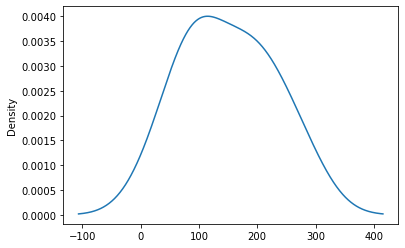

In [25]:
# Visualize the value counts of Broad Bean Origin
Review_Date_counts.plot.density()

In [26]:
# Determine which values to replace if counts are less than ...?
replace_Review_Date= list(Review_Date_counts[Review_Date_counts < 100].index)

# Replace in dataframe
for RD in replace_Review_Date:
    df_chocolate['Review_Date'] = df_chocolate['Review_Date'].replace(RD,"Other")
    
# Check to make sure binning was successful
df_chocolate['Review_Date'].value_counts()

2015     285
Other    266
2014     247
2016     219
2012     194
2013     184
2011     164
2009     123
2010     111
Name: Review_Date, dtype: int64

In [27]:
df_chocolate['Company'].sort_values().unique()

array(['A. Morin', 'AMMA', 'Acalli', 'Adi', 'Aequare (Gianduja)',
       'Ah Cacao', "Akesson's (Pralus)", 'Alain Ducasse', 'Alexandre',
       'Altus aka Cao Artisan', 'Amano', 'Amatller (Simon Coll)',
       'Amazona', 'Ambrosia', 'Amedei', 'Anahata', 'Animas', 'Ara',
       'Arete', 'Artisan du Chocolat', 'Artisan du Chocolat (Casa Luker)',
       'Askinosie', 'Bahen & Co.', 'Bakau', 'Bar Au Chocolat',
       "Baravelli's", 'Batch', 'Beau Cacao', 'Beehive', 'Belcolade',
       'Bellflower', 'Belyzium', 'Benoit Nihant', 'Bernachon',
       'Beschle (Felchlin)', 'Bisou', 'Bittersweet Origins',
       'Black Mountain', 'Black River (A. Morin)', 'Blanxart',
       'Blue Bandana', 'Bonnat', 'Bouga Cacao (Tulicorp)', 'Bowler Man',
       "Brasstown aka It's Chocolate", 'Brazen', 'Breeze Mill', 'Bright',
       'Britarev', 'Bronx Grrl Chocolate', 'Burnt Fork Bend', 'C-Amaro',
       'Cacao Arabuco', 'Cacao Atlanta', 'Cacao Barry', 'Cacao Hunters',
       'Cacao Market', 'Cacao Prieto', 'Ca

In [28]:
#Check spelling for Company Location values.
df_chocolate['Company_Location'].sort_values().unique()

array(['Amsterdam', 'Argentina', 'Australia', 'Austria', 'Belgium',
       'Bolivia', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
       'Czech Republic', 'Denmark', 'Domincan Republic', 'Ecuador',
       'Eucador', 'Fiji', 'Finland', 'France', 'Germany', 'Ghana',
       'Grenada', 'Guatemala', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Lithuania', 'Madagascar',
       'Martinique', 'Mexico', 'Netherlands', 'New Zealand', 'Niacragua',
       'Nicaragua', 'Peru', 'Philippines', 'Poland', 'Portugal',
       'Puerto Rico', 'Russia', 'Sao Tome', 'Scotland', 'Singapore',
       'South Africa', 'South Korea', 'Spain', 'St. Lucia', 'Suriname',
       'Sweden', 'Switzerland', 'U.K.', 'U.S.A.', 'Venezuela', 'Vietnam',
       'Wales'], dtype=object)

In [29]:
df_chocolate['Company_Location'] = df_chocolate['Company_Location'].str.replace('Domincan Republic', 'Dominican Republic')\
.str.replace('Eucador', 'Ecuador')\
.str.replace('Amsterdam','Netherlands')\
.str.replace('Niacragua', 'Nicaragua')\


df_chocolate['Company_Location'].sort_values().unique()

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Bolivia',
       'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
       'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador',
       'Fiji', 'Finland', 'France', 'Germany', 'Ghana', 'Grenada',
       'Guatemala', 'Honduras', 'Hungary', 'Iceland', 'India', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Lithuania', 'Madagascar',
       'Martinique', 'Mexico', 'Netherlands', 'New Zealand', 'Nicaragua',
       'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico',
       'Russia', 'Sao Tome', 'Scotland', 'Singapore', 'South Africa',
       'South Korea', 'Spain', 'St. Lucia', 'Suriname', 'Sweden',
       'Switzerland', 'U.K.', 'U.S.A.', 'Venezuela', 'Vietnam', 'Wales'],
      dtype=object)

In [30]:


## Text preparation (correction) function
def txt_prep(text):
    replacements = [
        ['-', ', '], ['/ ', ', '], ['/', ', '], ['\(', ', '], [' and', ', '], [' &', ', '], ['\)', ''],
        ['Dom Rep|DR|Domin Rep|Dominican Rep,|Domincan Republic', 'Dominican Republic'],
        ['Mad,|Mad$ ,|Madagascar,Java,Papua New Guinea', 'Madagascar, '],
        ['PNG,|PNG$', 'Papua New Guinea,'],
        ['Guat,|Guat$', 'Guatemala, '],
        ['Ven,|Ven$|Venez,|Venez$', 'Venezuela, '],
        ['Ecu,|Ecu$|Ecuad,|Ecuad$, |Ecuador,Madagascar,Papua New Guinea', 'Ecuador, '],
        ['Nic,|Nic$', 'Nicaragua, '],
        ['Cost Rica', 'Costa Rica'],
        ['Mex,|Mex$', 'Mexico, '],
        ['Jam,|Jam$', 'Jamaica, '],
        ['Haw,|Haw$', 'Hawaii, '],
        ['Gre,|Gre$', 'Grenada, '],
        ['Tri,|Tri$', 'Trinidad, '],
        ['C Am', 'Central America'],
        ['S America', 'South America'],
        [', $', ''], [',  ', ', '], [', ,', ', '],[',\s+', ','],
        [' Bali', ',Bali']
    ]
    for i, j in replacements:
        text = re.sub(i, j, str(text))
    return text



In [31]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
df_chocolate= df_chocolate.drop(columns=["Company", "REF","Bean_Origin_or_Bar_Name" ], axis=1)
df_chocolate.head()

,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
0,2016,0.63,France,3.75,,Sao Tome
1,2015,0.70,France,2.75,,Togo
2,2015,0.70,France,3.0,,Togo
3,2015,0.70,France,3.5,,Togo
4,2015,0.70,France,3.5,,Peru


In [32]:
def to_string(value):
    other = f"_{value}_"
    return other

In [33]:
def reduce_count_vals(df, colname, threshold):
    counts = df[colname].value_counts()
    replace_list = list(counts[counts < threshold].index)

    # Replace in dataframe
    for item in replace_list:
       df[colname] = df[colname].replace(item,"Other")

In [34]:
df_chocolate['Review_Date']= df_chocolate['Review_Date'].apply(to_string)
reduce_count_vals(df_chocolate, 'Review_Date', 100)

In [35]:
df_chocolate.dtypes

Review_Date           object
Cocoa_Percent        float64
Company_Location      object
Rating                object
Bean_Type             object
Broad_Bean_Origin     object
dtype: object

In [36]:
# Generate our categorical variable lists
chocolate_cat = df_chocolate.dtypes[df_chocolate.dtypes == 'object'].index.tolist()
chocolate_cat

['Review_Date', 'Company_Location', 'Rating', 'Bean_Type', 'Broad_Bean_Origin']

In [37]:
df_chocolate[chocolate_cat].dtypes

Review_Date          object
Company_Location     object
Rating               object
Bean_Type            object
Broad_Bean_Origin    object
dtype: object

In [38]:


# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df_chocolate[chocolate_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(chocolate_cat)
encode_df.head()



TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']